# <font color=#005CE8>WeRateDogs | Udacity</font>
________________

<p>Author: Eduardo Kaneko</p>
<p>Date: 10.04.2019</p>

# <font color=#005ce8> GUIDE: </font>

* [1. Importing Libraries](#import)
* [2. Gather The Data](#load)
* [3. Data Assessment](#assess)
* [4. Data Cleaning](#clean)
* [5. Exploratory Data Analysis](#ead)

<h2><a id="import" class="anchor"><font color=#005ce8>1. IMPORTING LIBRARIES</font></a></h2>

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import warnings
import tweepy
import json
import re
import os

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', -1)

<h2><a id="load" class="anchor"><font color=#005ce8>2. GATHER</font></a></h2>

Loading the data twitter-archive-enhanced.csv

In [5]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Loading the predictions

In [9]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

Loading the retweets and favorites from Twitter's api

In [11]:
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [12]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [15]:
with open('tweet_json.txt', 'a', encoding='UTF-8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            continue            

In [17]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

Creating a dataframe with the necessary variables

In [16]:
tweet_info = pd.DataFrame()

In [18]:
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

Saving the `tweet_info` as a csv file, to make loading easy

In [26]:
tweet_info.to_csv('tweet_info.csv')

**Section to load all files at once**

In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
tweet_info = pd.read_csv('tweet_info.csv')

<h2><a id="assess" class="anchor"><font color=#005ce8>3. DATA ASSESSMENT</font></a></h2>

Data assessment at `twitter_archive` table

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
# The min and max of the denominator should be 10.
print(len([x for x in twitter_archive['rating_denominator'] if x != 10]))

23


In [8]:
print(len([x for x in twitter_archive['rating_numerator'] if x > 20 or x < 10]))

464


In [9]:
# View rows where the value of 'name' is lowercase - indicates that it is not an actual name
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [10]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [11]:
twitter_archive.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

Data Assessment at `imag_pred` table

In [12]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
img_pred['tweet_id'].duplicated().sum()

0

In [15]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


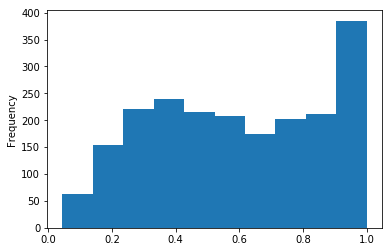

In [16]:
img_pred['p1_conf'].plot(kind='hist')

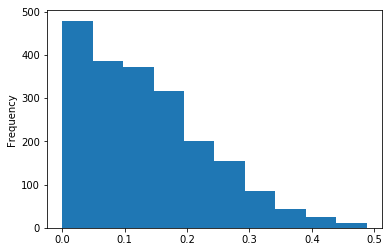

In [17]:
img_pred['p2_conf'].plot(kind='hist')

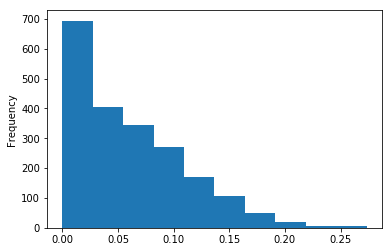

In [18]:
img_pred['p3_conf'].plot(kind='hist')

In [19]:
print(len([x for x in img_pred['p2_conf'] if x > 1]))

0


In [20]:
print(len([x for x in img_pred['p3_conf'] if x > 1]))

0


In [21]:
img_pred['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
img_pred['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
img_pred['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [24]:
img_pred['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

Data assessment at `tweet_info` table

In [25]:
tweet_info.head()

,Unnamed: 0,id,retweet_count,favorite_count
0,0,892420643555336193,8213,37681
1,1,892177421306343426,6074,32359
2,2,891815181378084864,4015,24379
3,3,891689557279858688,8369,40994
4,4,891327558926688256,9072,39197


In [26]:
tweet_info.describe()

,Unnamed: 0,id,retweet_count,favorite_count
count,885.000000,8.850000e+02,885.000000,885.000000
mean,442.000000,8.200511e+17,5078.734463,14398.667797
std,255.621791,3.693389e+16,5701.430320,15144.451188
min,0.000000,7.588287e+17,1.000000,0.000000
25%,221.000000,7.893144e+17,2093.000000,5454.000000
50%,442.000000,8.185888e+17,3460.000000,11015.000000
75%,663.000000,8.482137e+17,5941.000000,20333.000000
max,884.000000,8.924206e+17,60341.000000,139012.000000


In [27]:
tweet_info['id'].duplicated().sum()

0

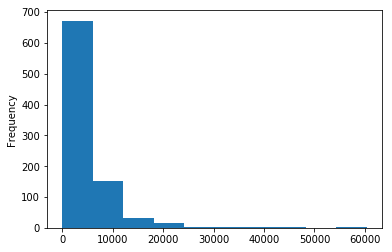

In [28]:
tweet_info['retweet_count'].plot(kind='hist')

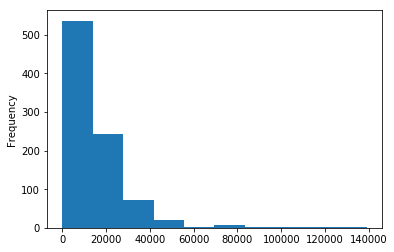

In [29]:
tweet_info['favorite_count'].plot(kind='hist')

In [30]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 4 columns):
Unnamed: 0        885 non-null int64
id                885 non-null int64
retweet_count     885 non-null int64
favorite_count    885 non-null int64
dtypes: int64(4)
memory usage: 27.7 KB


Taking a nearest look at completeness

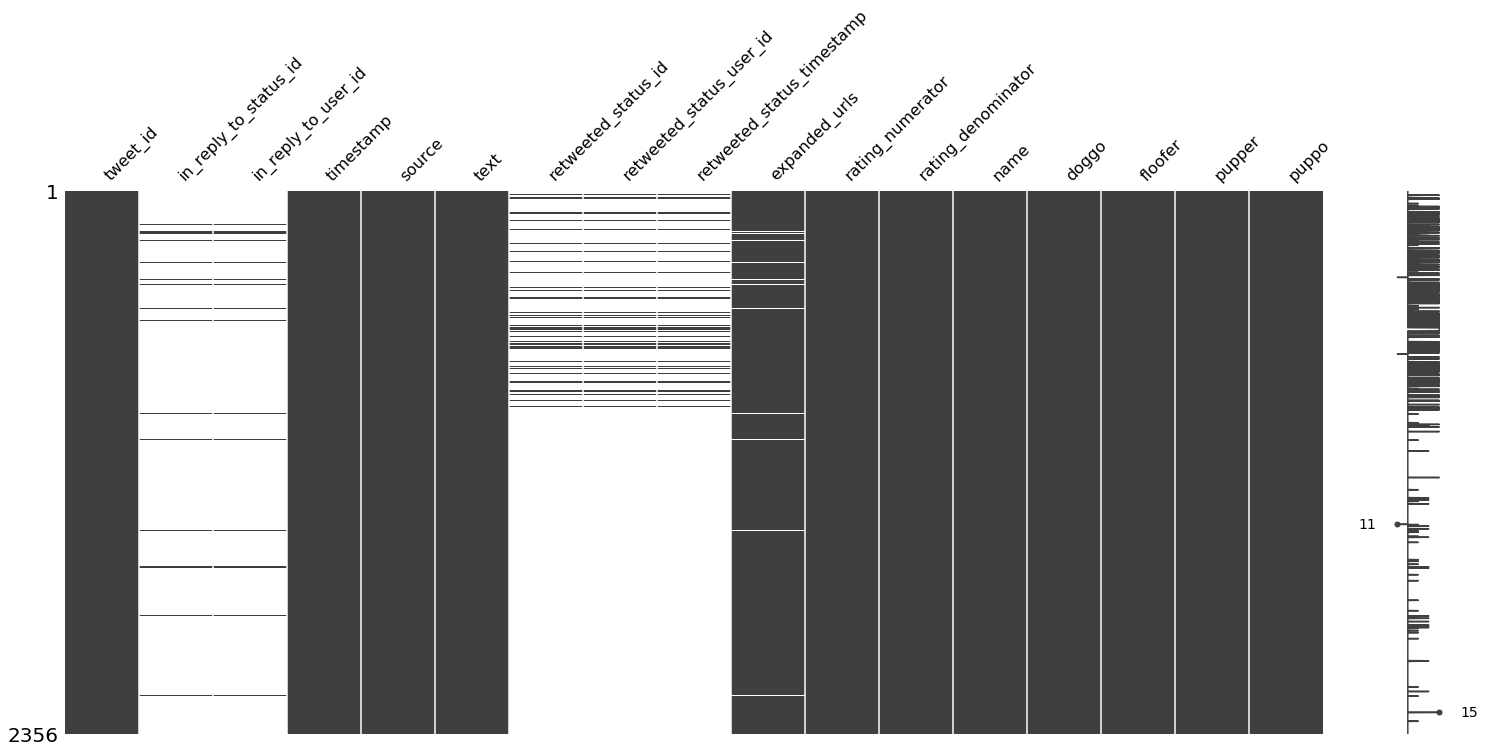

In [34]:
msno.matrix(twitter_archive);

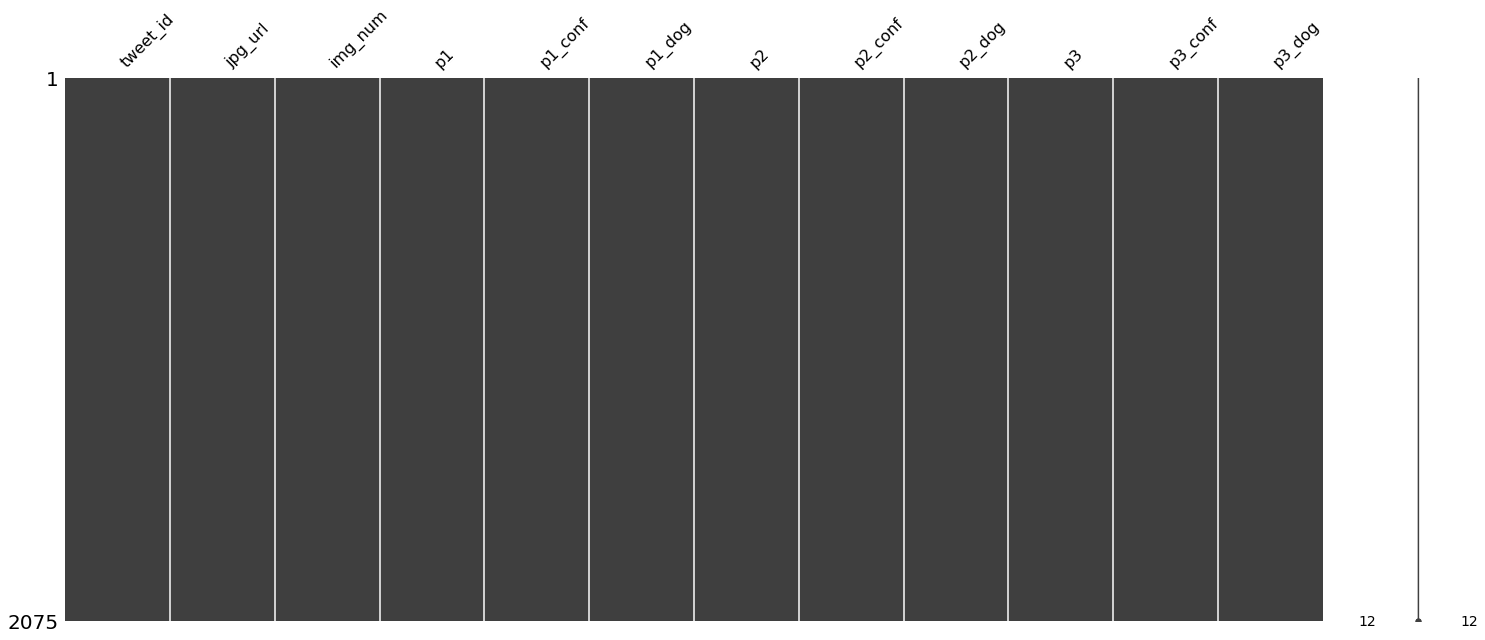

In [35]:
msno.matrix(img_pred);

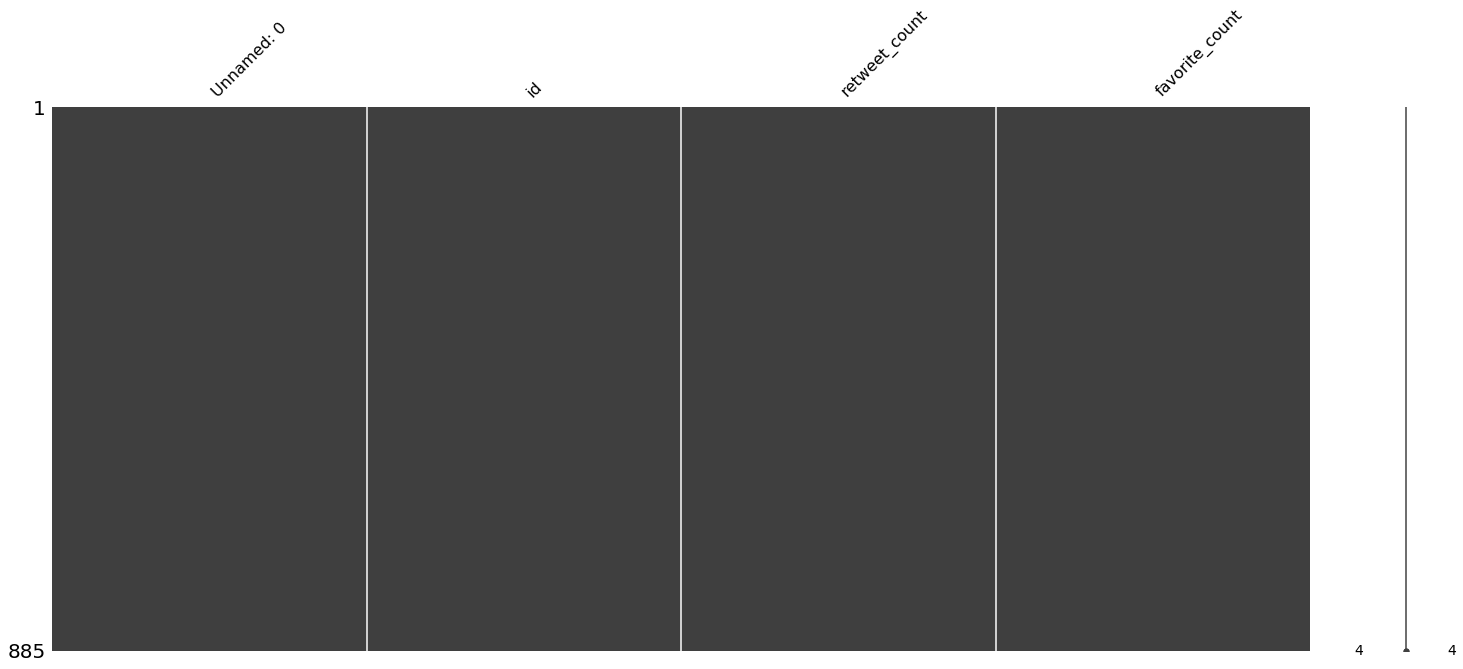

In [36]:
msno.matrix(tweet_info);

### Quality

**twitter_archive** table:
- Missing values: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `retweeted_status_timestamp`. 
- `timestamp` with wrong datatype
- `rating_denominator` can not be greater or less than 10. We have 23 observations that dont respect the condiction.
- There are 464 discrepant (Greater than 20 or Less than 10) values at `rating_numerator`  
- Tweet ID# 810984652412424192 doesn't contain a rating
- There are wrong dogs names (Lowercases, for example)

**img_pred** table:
- Different ways to say the same breed at `p1`, `p2` and `p3`
- As they are probabilities, we can not have numbers greater than 1 at `p1_conf`, `p2_conf`, `p3_conf`
- There are predictions where the pred is not a dog


**tweet_info** table:
- `id` column should be `tweet_id`

### Tidiness
- `twitter_archive` Type of dog in different columns: Doggo, floofer, pupper and puppo 
- `tweet_info` Duplicated column (*Unnamed: 0*)
- `twitter_archive` and `tweet_info` should be together 


<h2><a id="clean" class="anchor"><font color=#005ce8>4. DATA CLEANING</font></a></h2>

In [7]:
# Duplicating the original datasets
df1_clean = twitter_archive.copy()
df2_clean = img_pred.copy()
df3_clean = tweet_info.copy()

#### Define

- Create a categorical stage dog and drop the stage columns
- Drop the jpg_url duplicated
- Drop expanded_url duplicated
- Drop Null expanded_url

#### Code

In [8]:
df1_clean['dog_stage'] = df1_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [9]:
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df1_clean = df1_clean.drop(stage_columns, axis=1)

In [10]:
df1_clean = df1_clean.drop_duplicates(subset=['expanded_urls'], keep='last')

In [11]:
df2_clean = df2_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [12]:
df1_clean.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [13]:
df1_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN


In [14]:
df1_clean['dog_stage'].value_counts()

pupper     252
doggo      85 
puppo      31 
floofer    4  
Name: dog_stage, dtype: int64

In [15]:
df2_clean['jpg_url'].duplicated().sum()

0

In [16]:
df1_clean['expanded_urls'].duplicated().sum()

0

In [17]:
df1_clean[df1_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [18]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2218 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2218 non-null object
source                        2218 non-null object
text                          2218 non-null object
retweeted_status_id           102 non-null float64
retweeted_status_user_id      102 non-null float64
retweeted_status_timestamp    102 non-null object
expanded_urls                 2218 non-null object
rating_numerator              2218 non-null int64
rating_denominator            2218 non-null int64
name                          2218 non-null object
dog_stage                     372 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 259.9+ KB


In [19]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null int64
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


In [20]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 4 columns):
Unnamed: 0        885 non-null int64
id                885 non-null int64
retweet_count     885 non-null int64
favorite_count    885 non-null int64
dtypes: int64(4)
memory usage: 27.7 KB


#### Define
- Fixing the `id` column name of tweet_info table and dropping the `Unnamed: 0` column
- Drop df1_clean's useless columns

#### Code

In [21]:
df3_clean = df3_clean.rename(columns = {"id": "tweet_id"})

In [22]:
df3_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
               'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [24]:
df3_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37681
1,892177421306343426,6074,32359
2,891815181378084864,4015,24379
3,891689557279858688,8369,40994
4,891327558926688256,9072,39197


In [25]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


#### Define
- Fix the `timestamp` column: Creating date columns from timestamp
- Drop `timestamp`

#### Code

In [26]:
import datetime as dt

campos_datas = ['timestamp']

for var in campos_datas:
    df1_clean[var] = df1_clean[var].astype('datetime64[D]')
    var_d = var + '_day'
    var_m = var + '_month' 
    var_y = var + '_year'
    var_w = var + '_weekday'
    var_q = var + '_quarter'
    
    df1_clean[var_d] = df1_clean[var].dt.day
    df1_clean[var_m] = df1_clean[var].dt.month
    df1_clean[var_y] = df1_clean[var].dt.year
    df1_clean[var_w] = df1_clean[var].dt.weekday # Monday is 0 and Sunday is 6
    df1_clean[var_q] = df1_clean[var].dt.quarter  

In [27]:
df1_clean.drop(['timestamp'], axis=1, inplace=True)

#### Test

In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2218 non-null int64
source                2218 non-null object
text                  2218 non-null object
expanded_urls         2218 non-null object
rating_numerator      2218 non-null int64
rating_denominator    2218 non-null int64
name                  2218 non-null object
dog_stage             372 non-null object
timestamp_day         2218 non-null int64
timestamp_month       2218 non-null int64
timestamp_year        2218 non-null int64
timestamp_weekday     2218 non-null int64
timestamp_quarter     2218 non-null int64
dtypes: int64(8), object(5)
memory usage: 242.6+ KB


#### Define
- Merge all tables

#### Code

In [29]:
df_clean = pd.merge(left=df1_clean, right=df2_clean, on='tweet_id', how='left')

In [30]:
df_clean = pd.merge(left=df_clean, right=df3_clean, on='tweet_id', how='left')


#### Test

In [31]:
# twitter_archive_clean.info()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2217
Data columns (total 26 columns):
tweet_id              2218 non-null int64
source                2218 non-null object
text                  2218 non-null object
expanded_urls         2218 non-null object
rating_numerator      2218 non-null int64
rating_denominator    2218 non-null int64
name                  2218 non-null object
dog_stage             372 non-null object
timestamp_day         2218 non-null int64
timestamp_month       2218 non-null int64
timestamp_year        2218 non-null int64
timestamp_weekday     2218 non-null int64
timestamp_quarter     2218 non-null int64
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null obj

In [32]:
df_clean['tweet_id'].duplicated().sum()

0

In [33]:
df_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,1,8,2017,1,3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8213.0,37681.0


**Save the master DataFrame**

In [34]:
df_clean.to_csv('wrangle_master.csv')

In [35]:
# Checkpoint to load the dataframe
df_clean = pd.read_csv('wrangle_master.csv')

In [63]:
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

Checking the completeness of new dataset

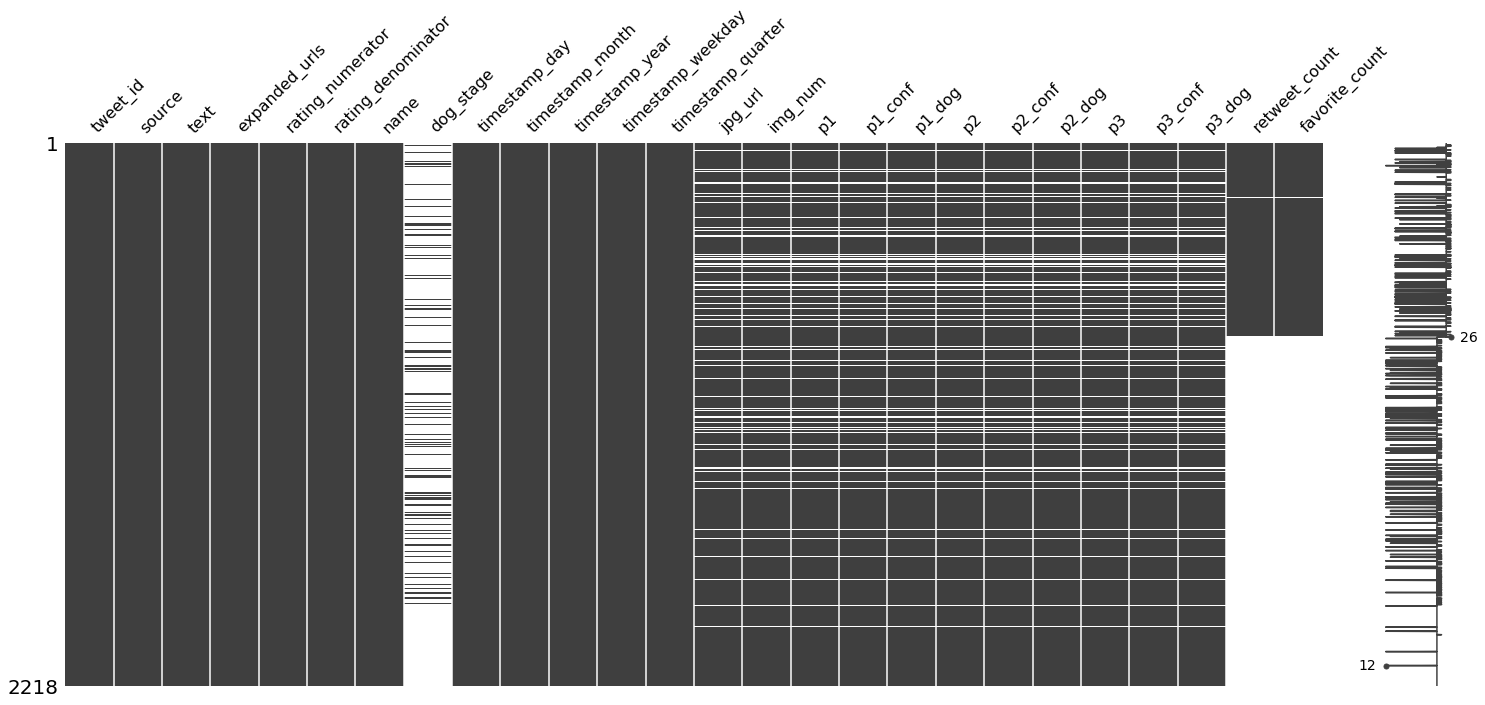

In [37]:
msno.matrix(df_clean);

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 26 columns):
tweet_id              2218 non-null int64
source                2218 non-null object
text                  2218 non-null object
expanded_urls         2218 non-null object
rating_numerator      2218 non-null int64
rating_denominator    2218 non-null int64
name                  2218 non-null object
dog_stage             372 non-null object
timestamp_day         2218 non-null int64
timestamp_month       2218 non-null int64
timestamp_year        2218 non-null int64
timestamp_weekday     2218 non-null int64
timestamp_quarter     2218 non-null int64
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null obj

#### Define
- Fix the `numerator` column. First, we will change the hole column to float, next, we will corret the numbers with the numerator of the text.

In [39]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
44,883482846933004288,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,NaN,8,7,2017,5,3,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,9620.0,44700.0
603,786709082849828864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,NaN,13,10,2016,3,4,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,6598.0,19264.0
667,778027034220126208,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,NaN,20,9,2016,1,3,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1749.0,6910.0
1585,680494726643068929,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,pupper,25,12,2015,4,4,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,NaN,NaN


#### Code

In [40]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype('float')

In [41]:
df_clean.loc[(df_clean['tweet_id'] == 883482846933004288) & (df_clean['rating_numerator'] == 5.0), ['rating_numerator']] = 13.5
df_clean.loc[(df_clean['tweet_id'] == 786709082849828864) & (df_clean['rating_numerator'] == 75.0), ['rating_numerator']] = 9.75
df_clean.loc[(df_clean['tweet_id'] == 778027034220126208) & (df_clean['rating_numerator'] == 27.0), ['rating_numerator']] = 11.27
df_clean.loc[(df_clean['tweet_id'] == 680494726643068929) & (df_clean['rating_numerator'] == 26.0), ['rating_numerator']] = 11.26

#### Test

In [42]:
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
44,883482846933004288,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN,8,7,2017,5,3,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,9620.0,44700.0
603,786709082849828864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,13,10,2016,3,4,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1.0,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,6598.0,19264.0
667,778027034220126208,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,20,9,2016,1,3,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1.0,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1749.0,6910.0
1585,680494726643068929,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,pupper,25,12,2015,4,4,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,NaN,NaN


#### Define
- There are only 18 rows with denominator greater than 10. Only 0.8% of the hole dataframe, so we will drop this rows. Actually, there are some reasons to have denominator greater than 10: Wrote wrong, more than 1 dog and It is another pet, not a dog.

In [43]:
print(len([x for x in df_clean['rating_denominator'] if x != 10]))

18


#### Code

In [45]:
i = df_clean[(df_clean['rating_denominator'] != 10)].index

In [46]:
df_clean.drop(i, inplace=True)

#### Test

In [47]:
print(len([x for x in df_clean['rating_denominator'] if x != 10]))

0


In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2217
Data columns (total 26 columns):
tweet_id              2200 non-null int64
source                2200 non-null object
text                  2200 non-null object
expanded_urls         2200 non-null object
rating_numerator      2200 non-null float64
rating_denominator    2200 non-null int64
name                  2200 non-null object
dog_stage             365 non-null object
timestamp_day         2200 non-null int64
timestamp_month       2200 non-null int64
timestamp_year        2200 non-null int64
timestamp_weekday     2200 non-null int64
timestamp_quarter     2200 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null o

#### Define
- Fixing the dataypes of denominator and dog_stage column

#### Code

In [50]:
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype('float')

In [51]:
df_clean['dog_stage'] = df_clean['dog_stage'].astype('category')

In [52]:
df_clean['p1'] = df_clean['p1'].astype('category')

In [53]:
df_clean['p2'] = df_clean['p2'].astype('category')

In [54]:
df_clean['p3'] = df_clean['p3'].astype('category')

#### Test

In [55]:
df_clean['dog_stage'].dtype

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

In [56]:
df_clean['p1'].dtype

CategoricalDtype(categories=['Afghan_hound', 'African_crocodile', 'African_grey',
                  'African_hunting_dog', 'Airedale',
                  'American_Staffordshire_terrier', 'American_black_bear',
                  'Angora', 'Appenzeller', 'Arabian_camel',
                  ...
                  'whippet', 'white_wolf', 'wild_boar', 'window_shade',
                  'wire-haired_fox_terrier', 'wombat', 'wood_rabbit',
                  'wooden_spoon', 'wool', 'zebra'],
                 ordered=False)

In [57]:
df_clean['p2'].dtype

CategoricalDtype(categories=['Afghan_hound', 'African_hunting_dog', 'Airedale',
                  'American_Staffordshire_terrier', 'American_alligator',
                  'American_black_bear', 'Angora', 'Appenzeller',
                  'Arabian_camel', 'Arctic_fox',
                  ...
                  'weasel', 'web_site', 'whippet', 'white_wolf', 'wig',
                  'window_screen', 'window_shade', 'wire-haired_fox_terrier',
                  'wombat', 'wood_rabbit'],
                 ordered=False)

In [58]:
df_clean['p3'].dtype

CategoricalDtype(categories=['Afghan_hound', 'African_chameleon', 'African_grey',
                  'Airedale', 'American_Staffordshire_terrier',
                  'American_black_bear', 'Angora', 'Appenzeller',
                  'Arabian_camel', 'Arctic_fox',
                  ...
                  'window_screen', 'wing', 'wire-haired_fox_terrier', 'wok',
                  'wolf_spider', 'wombat', 'wood_rabbit', 'wool', 'wreck',
                  'zebra'],
                 ordered=False)

In [59]:
df_clean['rating_denominator'].dtype

dtype('float64')

#### Saving the final dataset

In [64]:
df_clean.to_csv('twitter_archive_master.csv')

In [67]:
# Making the load easy
df_clean = pd.read_csv('twitter_archive_master.csv')
df_clean.drop(columns=['Unnamed: 0'], inplace=True)

<h2><a id="ead" class="anchor"><font color=#005ce8>5. EXPLORATORY DATA ANALYSIS</font></a></h2>

In [68]:
df_clean.head(1)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1,8,2017,1,3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8213.0,37681.0


In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 26 columns):
tweet_id              2200 non-null int64
source                2200 non-null object
text                  2200 non-null object
expanded_urls         2200 non-null object
rating_numerator      2200 non-null float64
rating_denominator    2200 non-null float64
name                  2200 non-null object
dog_stage             365 non-null object
timestamp_day         2200 non-null int64
timestamp_month       2200 non-null int64
timestamp_year        2200 non-null int64
timestamp_weekday     2200 non-null int64
timestamp_quarter     2200 non-null int64
jpg_url               1991 non-null object
img_num               1991 non-null float64
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null object
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null

In [70]:
# Saving numerical dataframe
df_num = df_clean[['rating_numerator', 'timestamp_day', 'timestamp_month', 'timestamp_year', 'timestamp_weekday', 
                  'timestamp_quarter', 'retweet_count', 'favorite_count']].copy()         

In [71]:
df_num.head()

,rating_numerator,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,retweet_count,favorite_count
0,13.0,1,8,2017,1,3,8213.0,37681.0
1,13.0,1,8,2017,1,3,6074.0,32359.0
2,12.0,31,7,2017,0,3,4015.0,24379.0
3,13.0,30,7,2017,6,3,8369.0,40994.0
4,12.0,29,7,2017,5,3,9072.0,39197.0


In [72]:
df_num.describe()

,rating_numerator,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,retweet_count,favorite_count
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.00000,783.000000,783.000000
mean,11.669445,15.991364,7.075909,2015.881818,2.817727,2.65500,5130.114943,16104.735632
std,38.690943,8.907815,4.101837,0.694051,1.994297,1.27614,5700.768479,15185.837150
min,0.000000,1.000000,1.000000,2015.000000,0.000000,1.00000,23.000000,0.000000
25%,10.000000,8.000000,3.000000,2015.000000,1.000000,1.00000,2178.000000,7572.500000
50%,11.000000,16.000000,7.000000,2016.000000,3.000000,3.00000,3460.000000,12365.000000
75%,12.000000,24.000000,11.000000,2016.000000,5.000000,4.00000,5841.000000,21328.500000
max,1776.000000,31.000000,12.000000,2017.000000,6.000000,4.00000,60341.000000,139012.000000


### Do we have outliers in rating_numerators?

In [104]:
df_clean[((df_clean.rating_numerator >=20))]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
867,749981277374128128,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,NaN,4,7,2016,0,3,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,NaN
1922,670842764863651840,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,NaN,29,11,2015,6,4,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1.0,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN,NaN


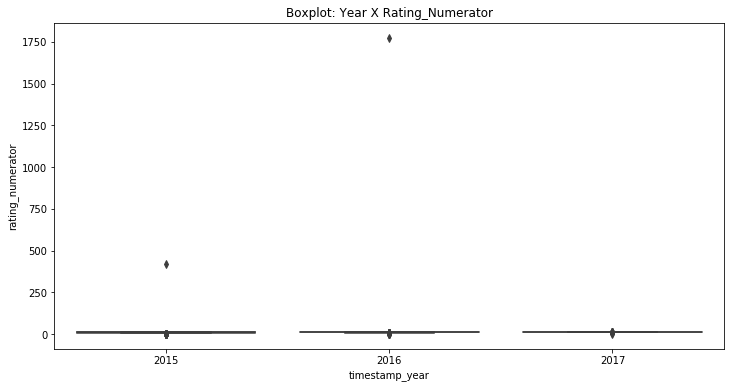

In [103]:
plt.figure(figsize=(12,6))
plt.title('Boxplot: Year X Rating_Numerator')
ax = sns.boxplot(x="timestamp_year", y="rating_numerator", data=df_clean)

In [77]:
df_num.loc[(df_num['rating_numerator'] >= 20)]

,rating_numerator,timestamp_day,timestamp_month,timestamp_year,timestamp_weekday,timestamp_quarter,retweet_count,favorite_count
867,1776.0,4,7,2016,0,3,NaN,NaN
1922,420.0,29,11,2015,6,4,NaN,NaN


### What will happen if we drop both?

In [81]:
df_num = df_num[((df_num.rating_numerator <=20))]

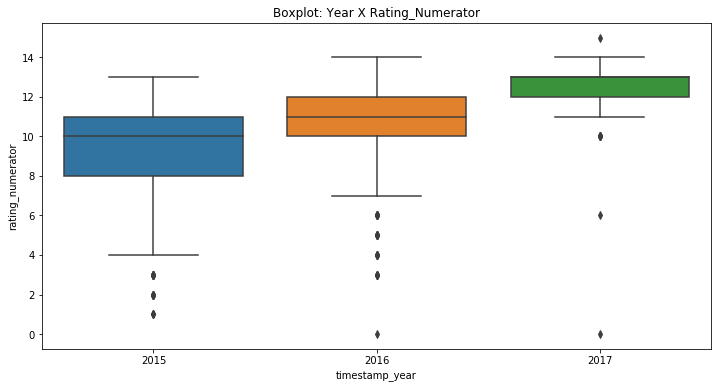

In [102]:
plt.figure(figsize=(12,6))
plt.title('Boxplot: Year X Rating_Numerator')
ax = sns.boxplot(x="timestamp_year", y="rating_numerator", data=df_num)

### Which week day have more dog ratings?

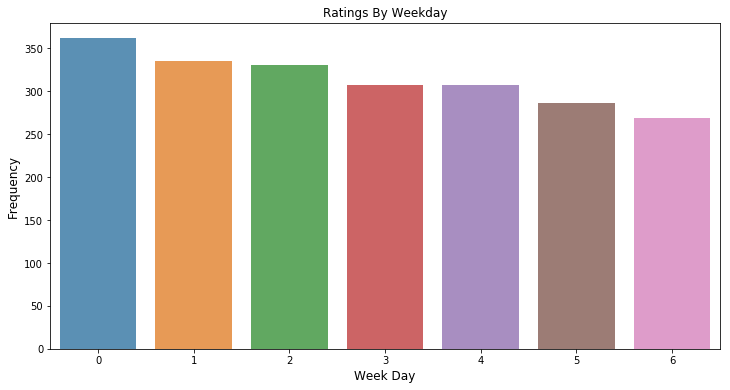

In [83]:
weekday_count = df_num['timestamp_weekday'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(weekday_count.index, weekday_count.values, alpha=0.8)
plt.title('Ratings By Weekday')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Week Day', fontsize=12)
plt.show();

### 2. Are there strong correlations between the rating and another variable?

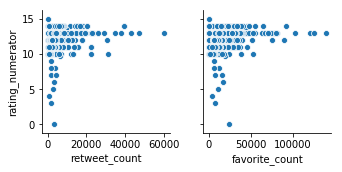

In [84]:
g = sns.pairplot(df_num, x_vars=["retweet_count", "favorite_count"],
                           y_vars=["rating_numerator"]);

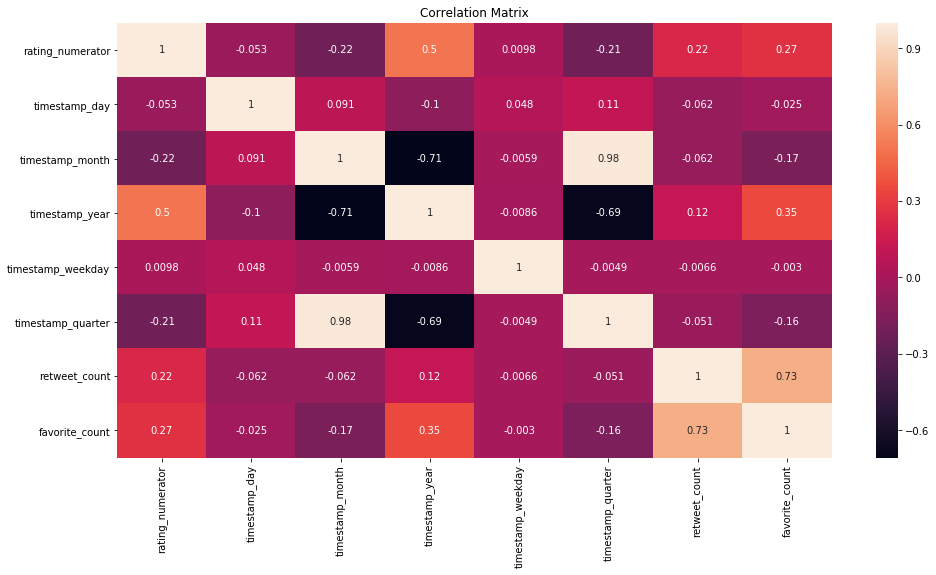

In [85]:
plt.figure(figsize=(16,8))
plt.title('Correlation Matrix')
sns.heatmap(df_num.corr(), annot=True);

### What's the distribution of rating_numerators?

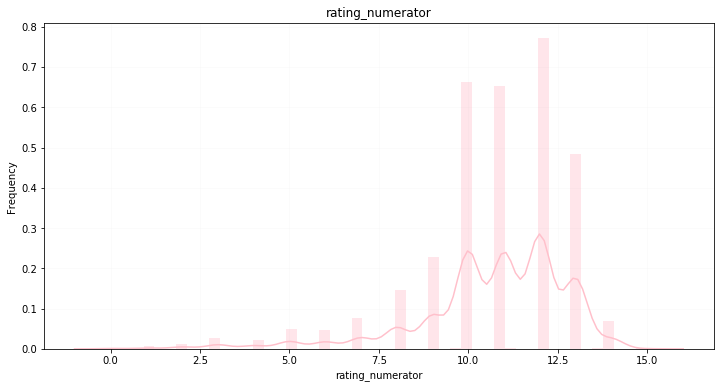

In [107]:
plt.figure(figsize=(12,6))
sns.distplot(df_num['rating_numerator'], color='Pink')
plt.title("rating_numerator")
plt.ylabel("Frequency")
plt.grid(alpha=0.05);

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


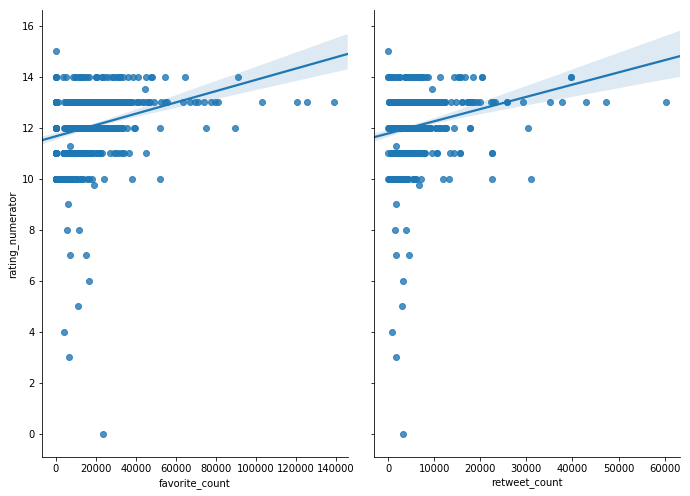

In [89]:
sns.pairplot(df_num, x_vars=['favorite_count', 'retweet_count'], y_vars='rating_numerator', size = 7, aspect = 0.7, kind='reg');

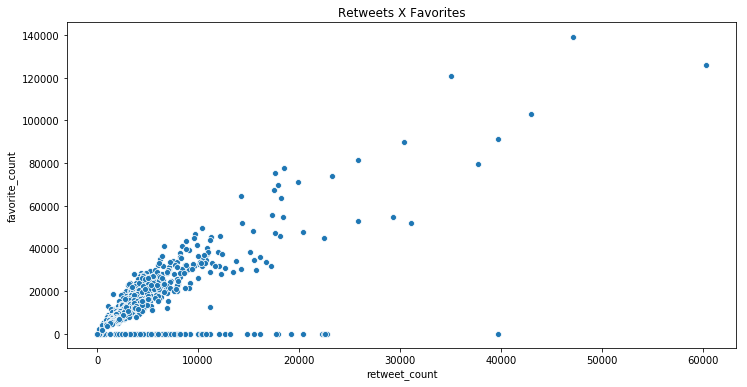

In [108]:
plt.figure(figsize=(12,6))
plt.title('Retweets X Favorites')
ax = sns.scatterplot(x="retweet_count", y="favorite_count", data=df_num);